<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/58/Uber_logo_2018.svg/1024px-Uber_logo_2018.svg.png" alt="UBER LOGO" width="50%" />

# UBER Pickups 

## Project 🚧

One of the main pain point that Uber's team found is that sometimes drivers are not around when users need them. For example, a user might be in San Francisco's Financial District whereas Uber drivers are looking for customers in Castro.  

(If you are not familiar with the bay area, check out <a href="https://www.google.com/maps/place/San+Francisco,+CA,+USA/@37.7515389,-122.4567213,13.43z/data=!4m5!3m4!1s0x80859a6d00690021:0x4a501367f076adff!8m2!3d37.7749295!4d-122.4194155" target="_blank">Google Maps</a>)

Eventhough both neighborhood are not that far away, users would still have to wait 10 to 15 minutes before being picked-up, which is too long. Uber's research shows that users accept to wait 5-7 minutes, otherwise they would cancel their ride. 

Therefore, Uber's data team would like to work on a project where **their app would recommend hot-zones in major cities to be in at any given time of day.**  

***Let's start to solve this problem***

Import common libraries

In [1]:
pip install plotly -q

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd 
import numpy as np

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

import plotly.express as px
import seaborn as sns

Import the datasets

In [3]:
path_to_file="/home/jovyan/FULLSTACK/MOD5_UNSUPERVISE/PROJECT/UBER/"
df = pd.read_csv(path_to_file+"uber-raw-data-apr14.csv")

data_list=["uber-raw-data-may14.csv","uber-raw-data-jun14.csv","uber-raw-data-jul14.csv","uber-raw-data-aug14.csv","uber-raw-data-sep14.csv"]

for i in data_list:
    read_df=pd.read_csv(path_to_file+i)
    df=df.append(read_df,ignore_index=True)

print("...Done.")


/tmp/ipykernel_339/1387629196.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(read_df,ignore_index=True)
/tmp/ipykernel_339/1387629196.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(read_df,ignore_index=True)
/tmp/ipykernel_339/1387629196.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(read_df,ignore_index=True)
/tmp/ipykernel_339/1387629196.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(read_df,ignore_index=True)


...Done.


/tmp/ipykernel_339/1387629196.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(read_df,ignore_index=True)


In [4]:
df.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [5]:
df.tail()

,Date/Time,Lat,Lon,Base
4534322,9/30/2014 22:57:00,40.7668,-73.9845,B02764
4534323,9/30/2014 22:57:00,40.6911,-74.1773,B02764
4534324,9/30/2014 22:58:00,40.8519,-73.9319,B02764
4534325,9/30/2014 22:58:00,40.7081,-74.0066,B02764
4534326,9/30/2014 22:58:00,40.7140,-73.9496,B02764


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534327 entries, 0 to 4534326
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date/Time  object 
 1   Lat        float64
 2   Lon        float64
 3   Base       object 
dtypes: float64(2), object(2)
memory usage: 138.4+ MB


In [7]:
#afin d'exploiter la colonne date et time nous allons la transformer
df['Date/Time']=pd.to_datetime(df['Date/Time'])

In [8]:
df.shape

(4534327, 4)

<B>PREPROCESSING

In [9]:
df.columns

Index(['Date/Time', 'Lat', 'Lon', 'Base'], dtype='object')

In [10]:
import datetime

In [11]:
df['Week_day']=df['Date/Time'].dt.day_name()
#df['Month']=df['Date/Time'].dt.month_name(locale = 'English')
df['Hour']=df['Date/Time'].dt.hour
#df['Minute']=df['Date/Time'].dt.minute

In [12]:
df.head()

,Date/Time,Lat,Lon,Base,Week_day,Hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,Tuesday,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,Tuesday,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,Tuesday,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,Tuesday,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,Tuesday,0


In [13]:
df['Hour'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [14]:
df['Week_day'].unique()

array(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'Monday'], dtype=object)

Pour commencer filtrons le dataset à 18h

In [15]:
dataset=df[df['Hour']==18].reset_index(drop=True)

In [16]:
dataset.head()

,Date/Time,Lat,Lon,Base,Week_day,Hour
0,2014-04-01 18:00:00,40.7568,-73.9718,B02512,Tuesday,18
1,2014-04-01 18:01:00,40.7381,-74.0085,B02512,Tuesday,18
2,2014-04-01 18:02:00,40.7986,-73.9728,B02512,Tuesday,18
3,2014-04-01 18:02:00,40.7570,-73.9720,B02512,Tuesday,18
4,2014-04-01 18:03:00,40.7535,-73.9786,B02512,Tuesday,18


In [17]:
dataset.shape

(324679, 6)

In [18]:
dataset=dataset.drop(columns=["Base","Date/Time","Hour"],axis=1)

In [19]:
dataset.head()

,Lat,Lon,Week_day
0,40.7568,-73.9718,Tuesday
1,40.7381,-74.0085,Tuesday
2,40.7986,-73.9728,Tuesday
3,40.7570,-73.9720,Tuesday
4,40.7535,-73.9786,Tuesday


Visualisons les données sur la carte

In [20]:
fig = px.scatter_mapbox(dataset, lat="Lat", lon="Lon", zoom =8.5,size_max=10,
                        mapbox_style="open-street-map",animation_frame="Week_day"
                      )
fig.show(renderer='iframe') 

In [21]:
days=dataset["Week_day"].unique().tolist()
days

['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday']

## Let's use the K-Means algorithm 

Afin d'utiliser l'algorithm K-Means, nous devons le nombre de cluster optimal

<B> La méthode Elbow permet de mesurer à quel point chaque point d'un cluster est proche des autres

In [22]:
X = dataset[['Lat','Lon']]
X = X.values

In [23]:
X

array([[ 40.7568, -73.9718],
       [ 40.7381, -74.0085],
       [ 40.7986, -73.9728],
       ...,
       [ 40.7094, -73.9517],
       [ 40.757 , -73.9744],
       [ 40.7412, -73.9791]])

In [24]:
wcss =  []
k = []
for i in range (1,11): 
    kmeans = KMeans(n_clusters= i, init = "k-means++", random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    k.append(i)
    print("WCSS for K={} --> {}".format(i, wcss[-1]))

WCSS for K=1 --> 1350.311748492863
WCSS for K=2 --> 821.4797085345713
WCSS for K=3 --> 634.2145980402738
WCSS for K=4 --> 512.0494877038856
WCSS for K=5 --> 402.293894131965
WCSS for K=6 --> 332.2793863013078
WCSS for K=7 --> 274.03438391729196
WCSS for K=8 --> 241.16906565688322
WCSS for K=9 --> 211.08420691451101
WCSS for K=10 --> 190.59442298499127


<AxesSubplot:>

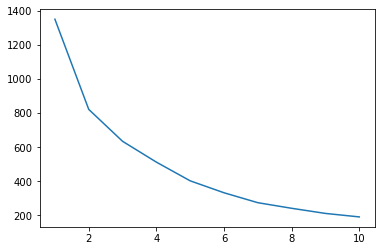

In [25]:
sns.lineplot(x=k,y=wcss)

<b> La métholde Silhouette permet de mesurer à quel point les clusters sont éloignés les uns des autres

In [26]:
sample = dataset[['Lat','Lon']].sample(10000)

In [27]:
sample_pros = sample.values

In [28]:
from sklearn.metrics import silhouette_score

sil = []
k = []
 
for i in range (2,11): 
    kmeans = KMeans(n_clusters= i, init = "k-means++", random_state = 0)
    kmeans.fit(sample_pros)
    sil.append(silhouette_score(sample_pros, kmeans.predict(sample_pros)))
    k.append(i)
    print("Silhouette score for K={} is {}".format(i, sil[-1]))

Silhouette score for K=2 is 0.7288258314657005
Silhouette score for K=3 is 0.406161656202955
Silhouette score for K=4 is 0.4295818680755176
Silhouette score for K=5 is 0.442703855970493
Silhouette score for K=6 is 0.45291266362205795
Silhouette score for K=7 is 0.456027122627277
Silhouette score for K=8 is 0.4638137933078611
Silhouette score for K=9 is 0.4377507910093058
Silhouette score for K=10 is 0.45158952351060905


<AxesSubplot:>

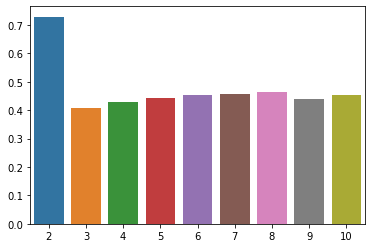

In [29]:
sns.barplot(x=k,y=sil)

Le bon nombre de clusters semble être entre 6 ou 7 


Essayons maintenant l'algo Kmeans sur le dataset

In [30]:
kmeans = KMeans(n_clusters= 6, init = "k-means++", random_state = 0)
kmeans.fit(X)
dataset['cluster'] = kmeans.labels_

In [31]:
dataset.head(10)

,Lat,Lon,Week_day,cluster
0,40.7568,-73.9718,Tuesday,4
1,40.7381,-74.0085,Tuesday,0
2,40.7986,-73.9728,Tuesday,4
3,40.7570,-73.9720,Tuesday,4
4,40.7535,-73.9786,Tuesday,4
5,40.7732,-73.8857,Tuesday,3
6,40.7420,-73.9851,Tuesday,0
7,40.7860,-73.9810,Tuesday,4
8,40.7059,-74.0167,Tuesday,0
9,40.7401,-73.9901,Tuesday,0


In [32]:
fig = px.scatter_mapbox(dataset, lat="Lat", lon="Lon", color="cluster",zoom =8.5,size_max=10,
                        mapbox_style="open-street-map",animation_frame="Week_day",range_color=[0,5])
fig.show(renderer='iframe') 

## Let's use the DBSCAN algorithm

L'algorithme DBSCAN (Density-Based-Spatial-Clustering of Application with Noise)
permet de définir des clusters en utilisant l'estimation de la densité locale 

Les 2 éléments principaux de cet algorithme sont le min_sample (soit le nombre minimum de points obligatoire pour définir un noyau) et le eps (distance entre un point et ceux de ses voisins)
Ici on choisit pour commencer<b> eps = 0.01 et min_samples=30 <b>


In [33]:
from sklearn.cluster import DBSCAN

In [43]:
dataset_dbscan = dataset.sample(50000)

In [44]:
X = dataset_dbscan[['Lat','Lon']]

In [45]:
X = X.values

In [46]:
#nous sommes obligés de prendre un échantillon de 10000 d'un point de vue de capacité de calcul
dbscan = DBSCAN(eps=0.01, min_samples=30, metric="manhattan", algorithm = "brute")
dbscan.fit(X)


DBSCAN(algorithm='brute', eps=0.01, metric='manhattan', min_samples=30)

In [47]:
dataset_dbscan['cluster_dbscan'] = dbscan.labels_

In [48]:
dataset_dbscan['cluster_dbscan'].unique()

array([ 0, -1,  1,  2,  3,  5,  4,  6,  7])

Avec cet algorithme et ces parametres nous obtenons 7 clusters (le cluster -1 correspondant au 'noise', c'est à dire les outliers qui ne rentrent dans aucun cluster)
Attention c'est seulement sur un échantillon de 50 000 données

In [49]:
dataset_dbscan=dataset_dbscan[dataset_dbscan['cluster_dbscan']>=0]

In [50]:
fig = px.scatter_mapbox(dataset_dbscan, lat="Lat", lon="Lon", color="cluster_dbscan",zoom =8.5,size_max=10,
                        mapbox_style="open-street-map",animation_frame="Week_day")
fig.show(renderer='iframe') 

## Let's compare the KMEANS algorithm results to the DBSCAN algorithm results

In [51]:
fig = px.scatter_mapbox(dataset, lat="Lat", lon="Lon", color="cluster",zoom =8.5,size_max=10,
                        mapbox_style="open-street-map",animation_frame="Week_day",range_color=[0,5], title="KMEANS Clustering with 6 clusters")
fig.show(renderer='iframe') 

In [53]:
fig = px.scatter_mapbox(dataset_dbscan, lat="Lat", lon="Lon", color="cluster_dbscan",zoom =8.5,size_max=10,
                        mapbox_style="open-street-map",animation_frame="Week_day",title="DBSCAN Clustering without the outliers- échantillon 50000")
fig.show(renderer='iframe') 

Nous avons crée des visualisations afin de repérer les différentes "hot zones" par jour", maintenant essayons de regarder <b>par heure de la journée

Prenons le mois de juin

In [55]:
dataset_hours = pd.read_csv('uber-raw-data-jun14.csv').drop('Base',axis=1)
dataset_hours['Entire_date']=pd.to_datetime(dataset_hours['Date/Time'])
dataset_hours['hours'] = dataset_hours['Entire_date'].dt.hour
dataset_hours.drop('Date/Time',axis=1,inplace=True)
dataset_hours.head()

,Lat,Lon,Entire_date,hours
0,40.7293,-73.9920,2014-06-01 00:00:00,0
1,40.7131,-74.0097,2014-06-01 00:01:00,0
2,40.3461,-74.6610,2014-06-01 00:04:00,0
3,40.7555,-73.9833,2014-06-01 00:04:00,0
4,40.6880,-74.1831,2014-06-01 00:07:00,0


In [57]:
X = dataset_hours[['Lat','Lon']]
X = X.values

<b> Méthode Elbow

In [59]:
wcss =  []
k = []
for i in range (1,11): 
    kmeans = KMeans(n_clusters= i, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    k.append(i)
    print("WCSS for K={} --> {}".format(i, wcss[-1]))


WCSS for K=1 --> 3108.387016087143
WCSS for K=2 --> 1887.6178010774213
WCSS for K=3 --> 1457.9838987611965
WCSS for K=4 --> 1132.0962722916552
WCSS for K=5 --> 865.9298558950126
WCSS for K=6 --> 703.4167055058487
WCSS for K=7 --> 597.5091915030309
WCSS for K=8 --> 524.4024943044619
WCSS for K=9 --> 461.7932042247607
WCSS for K=10 --> 414.98411204517976


<AxesSubplot:>

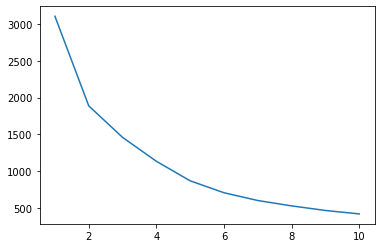

In [60]:
sns.lineplot(x=k,y=wcss)

In [66]:
kmeans = KMeans(n_clusters= 3, init = "k-means++", random_state = 0)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

In [67]:
dataset_hours['cluster'] = kmeans.labels_
fig = px.scatter_mapbox(dataset_hours,lat='Lat', lon='Lon',color='cluster', zoom=8.5, size_max=10,mapbox_style = 'open-street-map',animation_frame='hours', range_color=[0,2],title='KMEANS clustering with 3 clusters')
fig.show('iframe')
